In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from time import time

In [2]:
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [3]:
nb_classes = 9
batch_size = 64
nb_epoch = 50
np.random.seed(1337) # for reproducibility

the shape of train set 1200 rows, 1 columns
the shape of test set 2400 rows, 1 columns
the shape of validation set 2400 rows, 1 columns
Train on 1200 samples, validate on 2400 samples
Epoch 0
1200/1200 [==============================] - 72s - loss: 2.1896 - acc.: 0.1258 - val. loss: 2.1806 - val. acc.: 0.1488
Epoch 1
1200/1200 [==============================] - 71s - loss: 2.1738 - acc.: 0.1475 - val. loss: 2.1772 - val. acc.: 0.1488
Epoch 2
1200/1200 [==============================] - 71s - loss: 2.1697 - acc.: 0.1475 - val. loss: 2.1757 - val. acc.: 0.1488
Epoch 3
1200/1200 [==============================] - 74s - loss: 2.1641 - acc.: 0.1583 - val. loss: 2.1598 - val. acc.: 0.2286
Epoch 4
1200/1200 [==============================] - 78s - loss: 2.0644 - acc.: 0.2592 - val. loss: 1.9367 - val. acc.: 0.2936
Epoch 5
1200/1200 [==============================] - 71s - loss: 1.7413 - acc.: 0.3492 - val. loss: 1.2673 - val. acc.: 0.5452
Epoch 6
1200/1200 [==============================] - 8

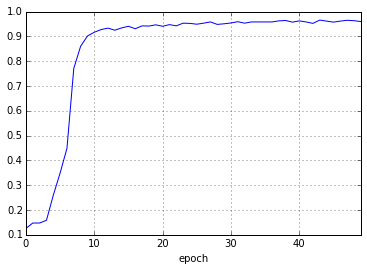

In [4]:
# Creating the model which consists of 3 conv layers followed by
# 2 fully conntected layers

# Sequential wrapper model
model = Sequential()

# first convolutional layer
model.add(Convolution2D(32, 1, 2, 2))
model.add(Activation('relu'))

# second convolutional layer
model.add(Convolution2D(48, 32, 2, 2))
model.add(Activation('relu')) 
model.add(MaxPooling2D(poolsize=(2,2)))

# third convolutional layer
model.add(Convolution2D(32, 48, 2, 2))
model.add(Activation('relu'))
model.add(MaxPooling2D(poolsize=(2,2)))

# convert convolutional filters to flatt so they can be feed to 
# fully connected layers
model.add(Flatten())

# first fully connected layer
model.add(Dense(32*6*6, 128, init='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# second fully connected layer
model.add(Dense(128, 128, init='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# last fully connected layer which output classes
model.add(Dense(128, 9, init='lecun_uniform'))
model.add(Activation('softmax'))

# setting sgd optimizer parameters
sgd = SGD(lr=0.05, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

features = joblib.load("./mldata/features_1200.mat")
labels = joblib.load("./mldata/lables_1200.mat")

features = np.array(features, 'int16')
labels = np.array(labels, 'int')

def scale(X, eps = 0.001):
    # scale the data points s.t the columns of the feature space
    # (i.e the predictors) are within the range [0, 1]
    return (X - np.min(X, axis = 0)) / (np.max(X, axis = 0) + eps)

features = features.astype("float32")
features = scale(features)

# scale the data to the range [0, 1] and then construct the training
# and testing splits
(trainX, testX, trainY, testY) = train_test_split(features, labels, test_size = 0.8)
(valX, testX, valY, testY) = train_test_split(testX, testY, test_size = 0.5)

# reshape for convolutions
trainX = trainX.reshape((trainX.shape[0], 1, 28, 28))
testX = testX.reshape((testX.shape[0], 1, 28, 28))
valX = valX.reshape((valX.shape[0], 1, 28, 28))

# convert class vectors to binary class matrices
trainY = np_utils.to_categorical(trainY, nb_classes)
testY = np_utils.to_categorical(testY, nb_classes)
valY = np_utils.to_categorical(valY, nb_classes)

print "the shape of train set %s rows, %s columns" %(trainX.shape[0], trainX.shape[1])
print "the shape of test set %s rows, %s columns" %(testX.shape[0], testX.shape[1])
print "the shape of validation set %s rows, %s columns" %(valX.shape[0], valX.shape[1])

mm = model.fit(trainX, trainY,
               batch_size=batch_size,
               nb_epoch=nb_epoch,
               show_accuracy=True,
               verbose=1,
               validation_data=(testX, testY))

score = model.evaluate(valX, valY, show_accuracy=True, verbose=0, batch_size=batch_size)
print 'Test score : %s' %score[0]
print 'Test accuracy : %s' %score[1]

df = pd.DataFrame(mm)
df.index = df['epoch']
df['acc'].plot()

the shape of train set 1800 rows, 1 columns
the shape of test set 2100 rows, 1 columns
the shape of validation set 2100 rows, 1 columns
Train on 1800 samples, validate on 2100 samples
Epoch 0
1800/1800 [==============================] - 88s - loss: 2.1884 - acc.: 0.1483 - val. loss: 2.1703 - val. acc.: 0.1552
Epoch 1
1800/1800 [==============================] - 89s - loss: 2.1760 - acc.: 0.1522 - val. loss: 2.1655 - val. acc.: 0.1552
Epoch 2
1800/1800 [==============================] - 98s - loss: 2.1627 - acc.: 0.1578 - val. loss: 2.0856 - val. acc.: 0.2747
Epoch 3
1800/1800 [==============================] - 89s - loss: 2.1742 - acc.: 0.2100 - val. loss: 2.1699 - val. acc.: 0.1552
Epoch 4
1800/1800 [==============================] - 92s - loss: 2.1578 - acc.: 0.1617 - val. loss: 2.0579 - val. acc.: 0.2602
Epoch 5
1800/1800 [==============================] - 88s - loss: 1.3818 - acc.: 0.5406 - val. loss: 0.5892 - val. acc.: 0.8086
Epoch 6
1800/1800 [==============================] - 9

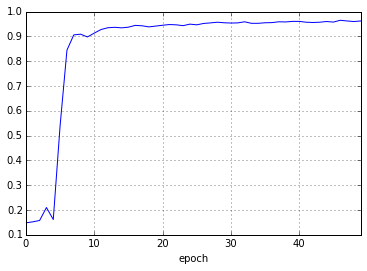

In [5]:
# Creating the model which consists of 3 conv layers followed by
# 2 fully conntected layers

# Sequential wrapper model
model = Sequential()

# first convolutional layer
model.add(Convolution2D(32, 1, 2, 2))
model.add(Activation('relu'))

# second convolutional layer
model.add(Convolution2D(48, 32, 2, 2))
model.add(Activation('relu')) 
model.add(MaxPooling2D(poolsize=(2,2)))

# third convolutional layer
model.add(Convolution2D(32, 48, 2, 2))
model.add(Activation('relu'))
model.add(MaxPooling2D(poolsize=(2,2)))

# convert convolutional filters to flatt so they can be feed to 
# fully connected layers
model.add(Flatten())

# first fully connected layer
model.add(Dense(32*6*6, 128, init='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# second fully connected layer
model.add(Dense(128, 128, init='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# last fully connected layer which output classes
model.add(Dense(128, 9, init='lecun_uniform'))
model.add(Activation('softmax'))

# setting sgd optimizer parameters
sgd = SGD(lr=0.05, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

features = joblib.load("./mldata/features_1200.mat")
labels = joblib.load("./mldata/lables_1200.mat")

features = np.array(features, 'int16')
labels = np.array(labels, 'int')

def scale(X, eps = 0.001):
    # scale the data points s.t the columns of the feature space
    # (i.e the predictors) are within the range [0, 1]
    return (X - np.min(X, axis = 0)) / (np.max(X, axis = 0) + eps)

features = features.astype("float32")
features = scale(features)

# scale the data to the range [0, 1] and then construct the training
# and testing splits
(trainX, testX, trainY, testY) = train_test_split(features, labels, test_size = 0.7)
(valX, testX, valY, testY) = train_test_split(testX, testY, test_size = 0.5)

# reshape for convolutions
trainX = trainX.reshape((trainX.shape[0], 1, 28, 28))
testX = testX.reshape((testX.shape[0], 1, 28, 28))
valX = valX.reshape((valX.shape[0], 1, 28, 28))

# convert class vectors to binary class matrices
trainY = np_utils.to_categorical(trainY, nb_classes)
testY = np_utils.to_categorical(testY, nb_classes)
valY = np_utils.to_categorical(valY, nb_classes)

print "the shape of train set %s rows, %s columns" %(trainX.shape[0], trainX.shape[1])
print "the shape of test set %s rows, %s columns" %(testX.shape[0], testX.shape[1])
print "the shape of validation set %s rows, %s columns" %(valX.shape[0], valX.shape[1])

mm = model.fit(trainX, trainY,
               batch_size=batch_size,
               nb_epoch=nb_epoch,
               show_accuracy=True,
               verbose=1,
               validation_data=(testX, testY))

score = model.evaluate(valX, valY, show_accuracy=True, verbose=0, batch_size=batch_size)
print 'Test score : %s' %score[0]
print 'Test accuracy : %s' %score[1]

df = pd.DataFrame(mm)
df.index = df['epoch']
df['acc'].plot()

the shape of train set 3000 rows, 1 columns
the shape of test set 1500 rows, 1 columns
the shape of validation set 1500 rows, 1 columns
Train on 3000 samples, validate on 1500 samples
Epoch 0
3000/3000 [==============================] - 151s - loss: 2.1777 - acc.: 0.1540 - val. loss: 2.1739 - val. acc.: 0.1425
Epoch 1
3000/3000 [==============================] - 145s - loss: 1.9790 - acc.: 0.2783 - val. loss: 1.6423 - val. acc.: 0.3968
Epoch 2
3000/3000 [==============================] - 162s - loss: 1.2428 - acc.: 0.5650 - val. loss: 0.5846 - val. acc.: 0.8588
Epoch 3
3000/3000 [==============================] - 163s - loss: 0.6615 - acc.: 0.8010 - val. loss: 0.3414 - val. acc.: 0.9165
Epoch 4
3000/3000 [==============================] - 156s - loss: 0.4018 - acc.: 0.9000 - val. loss: 0.3038 - val. acc.: 0.9217
Epoch 5
3000/3000 [==============================] - 133s - loss: 0.3377 - acc.: 0.9150 - val. loss: 0.3096 - val. acc.: 0.9310
Epoch 6
3000/3000 [=============================

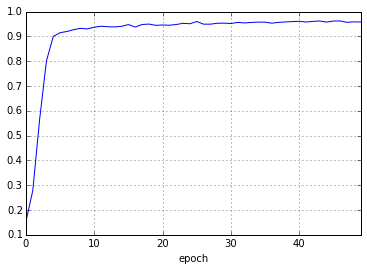

In [6]:
# Creating the model which consists of 3 conv layers followed by
# 2 fully conntected layers

# Sequential wrapper model
model = Sequential()

# first convolutional layer
model.add(Convolution2D(32, 1, 2, 2))
model.add(Activation('relu'))

# second convolutional layer
model.add(Convolution2D(48, 32, 2, 2))
model.add(Activation('relu')) 
model.add(MaxPooling2D(poolsize=(2,2)))

# third convolutional layer
model.add(Convolution2D(32, 48, 2, 2))
model.add(Activation('relu'))
model.add(MaxPooling2D(poolsize=(2,2)))

# convert convolutional filters to flatt so they can be feed to 
# fully connected layers
model.add(Flatten())

# first fully connected layer
model.add(Dense(32*6*6, 128, init='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# second fully connected layer
model.add(Dense(128, 128, init='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# last fully connected layer which output classes
model.add(Dense(128, 9, init='lecun_uniform'))
model.add(Activation('softmax'))

# setting sgd optimizer parameters
sgd = SGD(lr=0.05, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

features = joblib.load("./mldata/features_1200.mat")
labels = joblib.load("./mldata/lables_1200.mat")

features = np.array(features, 'int16')
labels = np.array(labels, 'int')

def scale(X, eps = 0.001):
    # scale the data points s.t the columns of the feature space
    # (i.e the predictors) are within the range [0, 1]
    return (X - np.min(X, axis = 0)) / (np.max(X, axis = 0) + eps)

features = features.astype("float32")
features = scale(features)

# scale the data to the range [0, 1] and then construct the training
# and testing splits
(trainX, testX, trainY, testY) = train_test_split(features, labels, test_size = 0.5)
(valX, testX, valY, testY) = train_test_split(testX, testY, test_size = 0.5)

# reshape for convolutions
trainX = trainX.reshape((trainX.shape[0], 1, 28, 28))
testX = testX.reshape((testX.shape[0], 1, 28, 28))
valX = valX.reshape((valX.shape[0], 1, 28, 28))

# convert class vectors to binary class matrices
trainY = np_utils.to_categorical(trainY, nb_classes)
testY = np_utils.to_categorical(testY, nb_classes)
valY = np_utils.to_categorical(valY, nb_classes)

print "the shape of train set %s rows, %s columns" %(trainX.shape[0], trainX.shape[1])
print "the shape of test set %s rows, %s columns" %(testX.shape[0], testX.shape[1])
print "the shape of validation set %s rows, %s columns" %(valX.shape[0], valX.shape[1])

mm = model.fit(trainX, trainY,
               batch_size=batch_size,
               nb_epoch=nb_epoch,
               show_accuracy=True,
               verbose=1,
               validation_data=(testX, testY))

score = model.evaluate(valX, valY, show_accuracy=True, verbose=0, batch_size=batch_size)
print 'Test score : %s' %score[0]
print 'Test accuracy : %s' %score[1]

df = pd.DataFrame(mm)
df.index = df['epoch']
df['acc'].plot()

the shape of train set 3420 rows, 1 columns
the shape of test set 1290 rows, 1 columns
the shape of validation set 1290 rows, 1 columns
Train on 3420 samples, validate on 1290 samples
Epoch 0
3420/3420 [==============================] - 150s - loss: 2.1782 - acc.: 0.1550 - val. loss: 2.1755 - val. acc.: 0.1499
Epoch 1
3420/3420 [==============================] - 150s - loss: 2.1425 - acc.: 0.2096 - val. loss: 1.9116 - val. acc.: 0.3308
Epoch 2
3420/3420 [==============================] - 157s - loss: 1.5503 - acc.: 0.4126 - val. loss: 0.8621 - val. acc.: 0.8539
Epoch 3
3420/3420 [==============================] - 141s - loss: 1.0735 - acc.: 0.6120 - val. loss: 0.4641 - val. acc.: 0.8784
Epoch 4
3420/3420 [==============================] - 140s - loss: 0.7830 - acc.: 0.7535 - val. loss: 0.3412 - val. acc.: 0.9219
Epoch 5
3420/3420 [==============================] - 138s - loss: 0.5168 - acc.: 0.8579 - val. loss: 0.2784 - val. acc.: 0.9308
Epoch 6
3420/3420 [=============================

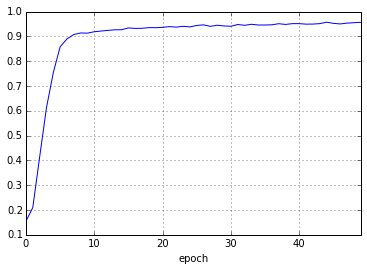

In [7]:
# Creating the model which consists of 3 conv layers followed by
# 2 fully conntected layers

# Sequential wrapper model
model = Sequential()

# first convolutional layer
model.add(Convolution2D(32, 1, 2, 2))
model.add(Activation('relu'))

# second convolutional layer
model.add(Convolution2D(48, 32, 2, 2))
model.add(Activation('relu')) 
model.add(MaxPooling2D(poolsize=(2,2)))

# third convolutional layer
model.add(Convolution2D(32, 48, 2, 2))
model.add(Activation('relu'))
model.add(MaxPooling2D(poolsize=(2,2)))

# convert convolutional filters to flatt so they can be feed to 
# fully connected layers
model.add(Flatten())

# first fully connected layer
model.add(Dense(32*6*6, 128, init='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# second fully connected layer
model.add(Dense(128, 128, init='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# last fully connected layer which output classes
model.add(Dense(128, 9, init='lecun_uniform'))
model.add(Activation('softmax'))

# setting sgd optimizer parameters
sgd = SGD(lr=0.05, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

features = joblib.load("./mldata/features_1200.mat")
labels = joblib.load("./mldata/lables_1200.mat")

features = np.array(features, 'int16')
labels = np.array(labels, 'int')

def scale(X, eps = 0.001):
    # scale the data points s.t the columns of the feature space
    # (i.e the predictors) are within the range [0, 1]
    return (X - np.min(X, axis = 0)) / (np.max(X, axis = 0) + eps)

features = features.astype("float32")
features = scale(features)

# scale the data to the range [0, 1] and then construct the training
# and testing splits
(trainX, testX, trainY, testY) = train_test_split(features, labels, test_size = 0.43)
(valX, testX, valY, testY) = train_test_split(testX, testY, test_size = 0.5)

# reshape for convolutions
trainX = trainX.reshape((trainX.shape[0], 1, 28, 28))
testX = testX.reshape((testX.shape[0], 1, 28, 28))
valX = valX.reshape((valX.shape[0], 1, 28, 28))

# convert class vectors to binary class matrices
trainY = np_utils.to_categorical(trainY, nb_classes)
testY = np_utils.to_categorical(testY, nb_classes)
valY = np_utils.to_categorical(valY, nb_classes)

print "the shape of train set %s rows, %s columns" %(trainX.shape[0], trainX.shape[1])
print "the shape of test set %s rows, %s columns" %(testX.shape[0], testX.shape[1])
print "the shape of validation set %s rows, %s columns" %(valX.shape[0], valX.shape[1])

mm = model.fit(trainX, trainY,
               batch_size=batch_size,
               nb_epoch=nb_epoch,
               show_accuracy=True,
               verbose=1,
               validation_data=(testX, testY))

score = model.evaluate(valX, valY, show_accuracy=True, verbose=0, batch_size=batch_size)
print 'Test score : %s' %score[0]
print 'Test accuracy : %s' %score[1]

df = pd.DataFrame(mm)
df.index = df['epoch']
df['acc'].plot()